<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation de la librairie Pandas
import pandas as pd

In [2]:
#Importation de la librairie plotly express
import plotly.express as px

In [3]:
#Importation de numpy
import numpy as np

In [4]:
import missingno as msno

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [5]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

In [6]:
#Avant d'utiliser pandas pour le chargement du fichier, explorons la structure du fichier
#Pour cela utilisons l'instruction ci-dessous qui permet d'ouvrir un fichier texte
with open("caracteristiques_vins.csv", "rb") as f:
    file = f.read()

#Et affichons le:
print(file)

b"post_name;poids;R\xe9gion;Domaine;Appellation;Couleur;C\xe9page;Mill\xe9sime;Garde;Contenance;Degr\xe9 d'alcool;Temp\xe9rature d\xe9gustation;Alliance mets\r\npierre-jean-villa-saint-joseph-preface-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2020;4-7 ans;75cl;13%;15\xb0C;Charcuterie, Lapin, Viande rouge, Volaille\r\npierre-jean-villa-saint-joseph-tilde-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Saint Joseph;Rouge;100% Syrah;2019;6-8 ans;75cl;13%;15\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-croze-hermitage-accroche-coeur-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Crozes-Hermitage;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;15\xb0C;Viande rouge, Volaille\r\npierre-jean-villa-igp-gamine-2018;1.5 kg;Rh\xf4ne;Pierre Jean Villa;Collines Rhodaniennes;Rouge;100% Syrah;2020;3-5 ans;75cl;13%;14\xb0C;Charcuterie, Viande rouge, Volaille\r\npierre-jean-villa-cote-rotie-carmina-2017;1.5 kg;Rh\xf4ne;Pierre Jean Villa;C\xf4te R\xf4tie;Rouge;100% Syrah;2019;10-20 ans;7

In [7]:
#Vous avez dû constater que les champs sont séparées par des point-virgule

#tentons d'ouvrir le fichier avec pandas avec cet élément
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep=";")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 17: invalid continuation byte

Nous obtenons une erreur, elle est de type <code>UnicodeDecodeError</code><br>
Celle-ci semble être liée à l'encodage du fichier<br>
Utilisons la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [8]:
#Importation de la bibilothèque
import urllib.request

#(à noter que c'est une mauvaise pratique d'importer une bibliothèque au milieu d'un programme)
#(celle-ci doit toujours figurer au début du script)
import chardet

Rendez-vous sur le lien ci-après pour identifier l'instruction dont vous aurez besoin:<br>
https://chardet.readthedocs.io/en/latest/usage.html#basic-usage

In [9]:
#Identification de l'encodage du fichier
file_path = "caracteristiques_vins.csv"
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']
encoding = detect_encoding(file_path)
print("L'encodage est de type", encoding)

L'encodage est de type Windows-1252


In [10]:
#A présent que nous connaissons les séparateurs et l'encodage du fichier
#Utilisons Pandas pour charger le fichier
#Je vous laisse le soin de renseigner les champs manquants
nom_du_fichier = "caracteristiques_vins.csv"
type_de_separateur = ";"
encodage_du_fichier_csv = "cp1252"

df_caracteristiques = pd.read_csv(nom_du_fichier, sep=type_de_separateur, encoding=encodage_du_fichier_csv)
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [11]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))
df_erp.shape

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


(825, 5)

In [12]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

In [13]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_erp.dtypes
## df_erp.info()

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [14]:
#Afficher les 5 premières lignes de la table
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [15]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons_erp = df_erp.duplicated().sum()
print("Le fichier sondé a", doublons_erp, "doublons")


Le fichier sondé a 0 doublons


In [16]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
df_erp["stock_status"].unique()
#Liée avec la colonne "stock_quantity"

array(['outofstock', 'instock'], dtype=object)

In [17]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "outofstock" if x == 0 else "instock")
display(df_erp)


,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,instock
821,7204,0,45.0,9,instock,instock
822,7247,1,54.8,23,instock,instock
823,7329,0,26.5,14,instock,instock


In [18]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0      True
1      True
2      True
3      True
4      True
       ... 
820    True
821    True
822    True
823    True
824    True
Length: 825, dtype: bool

In [19]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

824

In [20]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
443,4954,1,25.0,0,instock,outofstock


In [21]:
#Corriger la ou les données incohérentes

df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]

In [22]:
(df_erp["stock_status"] == df_erp["stock_status_2"]).sum()

825

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [23]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
valeurs_manquantes = df_erp[df_erp['price'].isnull()]
print("Nombres d'article avec un prix non renseignés: {}".format(valeurs_manquantes.shape[0])) #Saisir l'instruction manquante dans la fonction format

Nombres d'article avec un prix non renseignés: 0


In [24]:
#Afficher le prix minimum de la colonne "price"
df_erp['price'].min()

5.2

In [25]:
#Afficher le prix maximum de la colonne "price"
df_erp['price'].max()

225.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [26]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
df_erp['stock_quantity'].min()

0

In [27]:
#Afficher la quantité maximum de la colonne "stock_quantity"
df_erp['stock_quantity'].max()

578

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [28]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
df_erp['onsale_web'].unique()

#Colonne qui sert à déterminer quel produit est en vente sur la boutique en ligne. La valeur en booléen permet d'identifier par un 1 les produits qui y sont et par 0 ceux qui n'y sont pas.

array([1, 0])

In [29]:
#Quelles sont les colonnes à conserver selon vous?
df_erp.head()
#Il faut toutes les conserver sauf la colonne "stock_status" qu'on a précédemment remplacé par la colonne "stock_status_2". La valeur de cette dernière étant basée sur une condition portant
#sur la colonne "stock_quantity", sa valeur sera forcément juste comparée à la colonne "stock_quantity" dont les valeurs ont sans doute été saisies manuellement.

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [30]:
#créer une colonne "stock_status" copie de la colonne "stock_status_2"
df_erp["stock_status"] = df_erp["stock_status_2"]
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,stock_status_2
0,3847,1,24.2,0,outofstock,outofstock
1,3849,1,34.3,0,outofstock,outofstock
2,3850,1,20.8,0,outofstock,outofstock
3,4032,1,14.1,0,outofstock,outofstock
4,4039,1,46.0,0,outofstock,outofstock


In [31]:
#Supprimer les colonnes "stock_status" et "stock_status_2"
#Cette colonne est redondante avec la colonne "stock_quantity". Dans notre projet cette information n'est pas utile.
df_erp = df_erp.drop(columns=['stock_status', 'stock_status_2'])
df_erp.head()

,product_id,onsale_web,price,stock_quantity
0,3847,1,24.2,0
1,3849,1,34.3,0
2,3850,1,20.8,0
3,4032,1,14.1,0
4,4039,1,46.0,0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [32]:
#Dimension du dataset
#Nombre d'observations (lignes)
#Nombre de caractéristiques (colonnes)
print("Le fichier a",df_web.shape[0],"lignes et",df_web.shape[1],"colonnes")
df_web.shape

Le fichier a 1513 lignes et 28 colonnes


(1513, 28)

In [33]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [34]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.count()

sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64

In [35]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [36]:
#Selon vous, quelles sont les colonnes à conserver ?

#Toutes celles qui n'ont pas de valeurs distinctes.
df_web['sku'].unique()
print(df_web['virtual'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['downloadable'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['rating_count'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['average_rating'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['tax_class'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['post_author'].unique()) # Ne comporte que des valeurs 2 --> A SUPPRIMER
df_web['post_date'].unique()
df_web['post_date_gmt'].unique()
print(df_web['post_content'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_title'].unique()
df_web['post_excerpt'].unique()
df_web['post_status'].unique()
print(df_web['comment_status'].unique()) #Ne comport que des valeurs 'closed'
print(df_web['ping_status'].unique()) # Ne comporte que des valeurs 'closed' --> A SUPPRIMER
print(df_web['post_password'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_name'].unique()
df_web['post_modified'].unique()
df_web['post_modified_gmt'].unique()
print(df_web['post_content_filtered'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['post_parent'].unique()) # Ne comporte que des valeurs NaN ou 0 --> A SUPPRIMER
df_web['guid'].unique()
print(df_web['menu_order'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_type'].unique()
print(df_web['post_mime_type'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['comment_count'].unique()) # Ne comporte que des valeurs NaN ou 0 --> A SUPPRIMER

[0]
[0]
[0]
[ 0. nan]
[nan]
[ 1.  2. nan]
[nan]
['closed' nan]
['closed' nan]
[nan]
[nan]
[ 0. nan]
[ 0. nan]
[nan 'image/jpeg']
[ 0. nan]


In [37]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(columns=['virtual', 'downloadable', 'rating_count','average_rating','tax_class','post_author', 'post_content', 'comment_status', 'ping_status', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count'])

In [38]:
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product


In [39]:
#Visualisation des valeurs de la colonne sku
df_web['sku'].unique()
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification ?


array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [40]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
#On veut isoler toutes les valeurs de type string
#On supprime les lignes avec les sku intrus
df_web[df_web['sku'].str.len() > 5]

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
797,13127-1,0.0,taxable,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
1209,bon-cadeau-25-euros,10.0,NaN,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,NaN,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [41]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
#On n'affiche pas les codes sku supérieurs à 5 caractères
df_web['length_sku'] = df_web['sku'].apply(lambda x: len(str(x)))
df_web = df_web[df_web['length_sku'] <= 5]
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,5
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,5
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,5
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,5
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,5


In [42]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web['sku'].duplicated().sum()

796

In [43]:
#La clé n'est pas unique, il y'a des doublons. Il faut supprimer les lignes dont le post_type est "attachment"
df_web = df_web[df_web['post_type'] != 'attachment']
display(df_web)

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,5
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,5
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,5
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,5
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
794,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
795,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
796,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3


In [44]:
df_web['sku'].duplicated().sum()

84

In [45]:
#Identifier les lignes sans code articles
df_web.loc[df_web['sku'].isnull()]

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
178,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
179,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
227,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
230,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
231,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
793,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
794,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
795,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3


<Axes: >

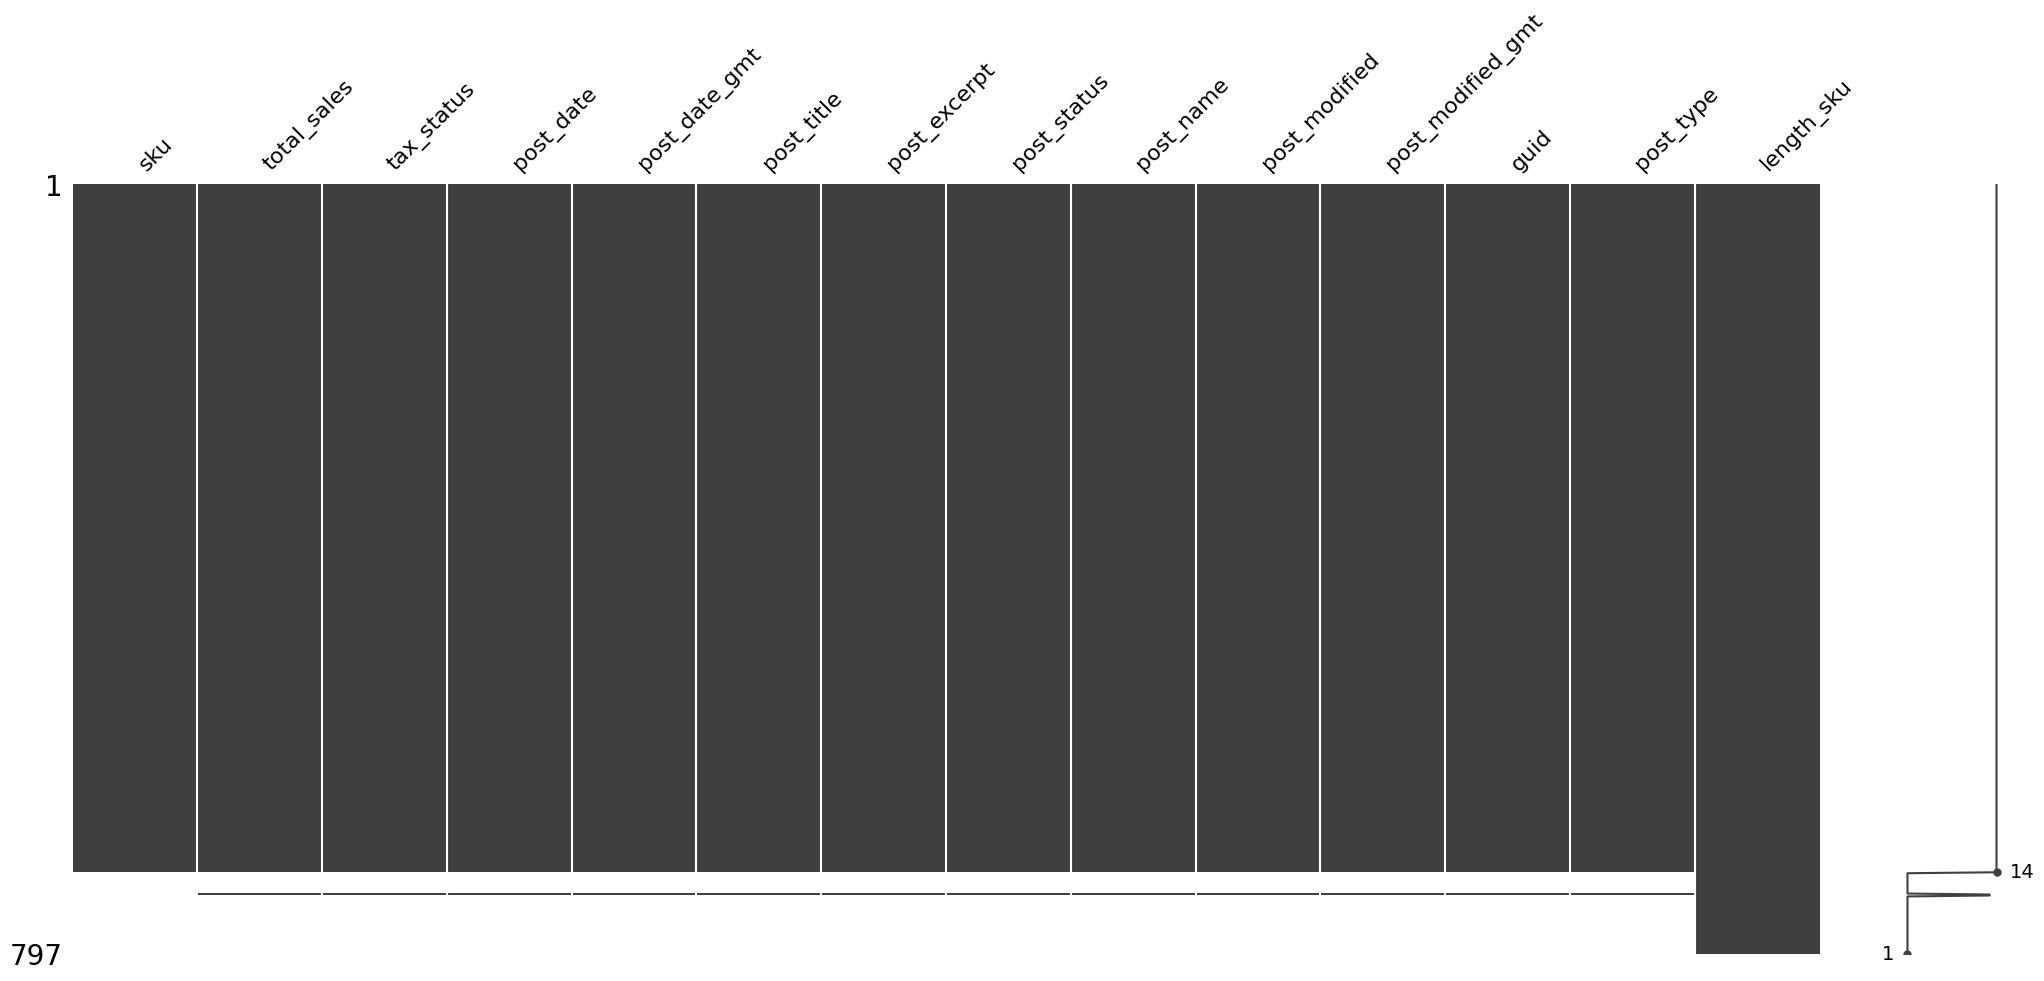

In [46]:
msno.matrix(df_web.sort_values(by=['sku'], axis=0))

In [47]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_code_article_manquant = df_web.loc[df_web['sku'].isnull()]

In [48]:
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseignées dans chacune des colonnes
df_code_article_manquant.info()
#3 - Que constatez-vous?
#Pas de valeurs

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 178 to 796
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_date          2 non-null      datetime64[ns]
 4   post_date_gmt      2 non-null      datetime64[ns]
 5   post_title         2 non-null      object        
 6   post_excerpt       2 non-null      object        
 7   post_status        2 non-null      object        
 8   post_name          2 non-null      object        
 9   post_modified      2 non-null      datetime64[ns]
 10  post_modified_gmt  2 non-null      datetime64[ns]
 11  guid               2 non-null      object        
 12  post_type          2 non-null      object        
 13  length_sku         85 non-null     int64         
dtypes: datetime64[

In [49]:
#Supprimer ces 85 lignes vides
df_web = df_web.loc[~df_web['sku'].isnull()]
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,5
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,5
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,5
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,5
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,5


In [50]:
df_web['sku'].duplicated().sum()

0

In [51]:
df_web['sku'].shape[0]

712

In [52]:
#On supprime maintenant la colonne length_sku créée pour filtrer
df_web = df_web.drop(columns=['length_sku'])
df_web

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,15741,2.0,taxable,2020-04-25 12:49:49,2020-04-25 10:49:49,Le Cèdre de Jean Faure Saint-Emilion 2016,Un nez ouvert sur un velouté de fruits rouges...,publish,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,https://www.bottle-neck.fr/?post_type=product&...,product
762,16135,5.0,taxable,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
767,15891,0.0,taxable,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
768,15887,0.0,taxable,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [53]:
#Dimension du dataset
print("le fichier comporte", df_liaison.shape[0], "lignes et", df_liaison.shape[1], "colonnes.")
df_liaison.shape
#Nombre d'observations
#Nombre de caractéristiques


le fichier comporte 825 lignes et 2 colonnes.


(825, 2)

In [54]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [55]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.count()

product_id    825
id_web        734
dtype: int64

In [56]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
(df_liaison['product_id'].duplicated()).sum()

0

In [57]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
(df_liaison['id_web'].duplicated()).sum()

#90 valeurs en double

90

In [58]:
display(df_liaison)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [59]:
#Avons-nous des articles sans correspondances?
df_liaison.loc[df_liaison['id_web'].isnull()]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [60]:
# Il faut supprimer les articles sans correspondance
df_liaison = df_liaison.dropna()
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [61]:
#Dimension du dataset
print("Le fichier contient", df_caracteristiques.shape[0], "lignes et", df_caracteristiques.shape[1], "colonnes")
df_caracteristiques.shape
#Nombre d'observations

#Nombre de caractéristiques


Le fichier contient 611 lignes et 13 colonnes


(611, 13)

In [62]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_caracteristiques.dtypes

post_name                   object
poids                       object
Région                      object
Domaine                     object
Appellation                 object
Couleur                     object
Cépage                      object
Millésime                  float64
Garde                       object
Contenance                  object
Degré d'alcool              object
Température dégustation     object
Alliance mets               object
dtype: object

In [63]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.count()

post_name                  611
poids                      611
Région                     586
Domaine                    577
Appellation                559
Couleur                    566
Cépage                     571
Millésime                  541
Garde                      569
Contenance                 611
Degré d'alcool             586
Température dégustation    574
Alliance mets              574
dtype: int64

In [64]:
#Affichage des 5 premières lignes du dataset
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [65]:
#Quels sont les produits avec des informations manquantes?
df_caracteristiques.loc[df_caracteristiques['Millésime'].isnull() | df_caracteristiques['Région'].isnull() | df_caracteristiques['Domaine'].isnull() | df_caracteristiques['Appellation'].isnull() | df_caracteristiques['Couleur'].isnull() | df_caracteristiques['Cépage'].isnull() | df_caracteristiques['Garde'].isnull() | df_caracteristiques["Degré d'alcool"].isnull() | df_caracteristiques['Température dégustation'].isnull() | df_caracteristiques['Alliance mets'].isnull()]


,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [ ]:
#Est-il possible de corriger les données manquantes?
#NON

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [66]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id')
df_merge.head()

,product_id,onsale_web,price,stock_quantity,id_web
0,3847,1,24.2,0,15298
1,3849,1,34.3,0,15296
2,3850,1,20.8,0,15300
3,4032,1,14.1,0,19814
4,4039,1,46.0,0,19815


In [67]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
df_merge.loc[df_merge['id_web'].isnull()]
# Non

,product_id,onsale_web,price,stock_quantity,id_web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [68]:
df_merge.head()

,product_id,onsale_web,price,stock_quantity,id_web
0,3847,1,24.2,0,15298
1,3849,1,34.3,0,15296
2,3850,1,20.8,0,15300
3,4032,1,14.1,0,19814
4,4039,1,46.0,0,19815


In [69]:
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [70]:
#Fusionnez les datasets df_merge et df_web
df_merge_2 = pd.merge(df_merge, df_web, left_on='id_web', right_on= 'sku' )
# On peut aussi renommer un ces deux colonnes pour que les 2 aient le même nom (et ne pas faire le left_on / right_on)
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,15298,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,15296,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,15300,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,19814,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,19815,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [71]:
#Avons-nous des lignes sans correspondances?
df_merge_2.loc[df_merge_2['sku'].isnull()]
#Non

,product_id,onsale_web,price,stock_quantity,id_web,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type


In [72]:
# SUppr 1 des 2 colonnes sku ou id_web
df_merge_2 = df_merge_2.drop(columns=['sku'])
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [73]:
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [74]:
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [75]:
#Fusion de la table df_merge et df_caracteristiques
df_boutique_web = pd.merge(df_merge_2, df_caracteristiques, on='post_name')
df_boutique_web.head()

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,1,24.2,0,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3849,1,34.3,0,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,3850,1,20.8,0,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,4032,1,14.1,0,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,4039,1,46.0,0,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

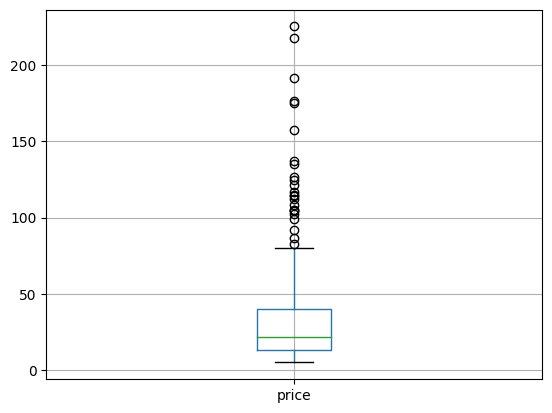

In [76]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
pd.DataFrame(df_boutique_web['price']).boxplot()

In [77]:
#Autre méthode avec plotly express
px.box(df_boutique_web, x='price')

In [106]:
#compter le nombre d'outliers
df_boutique_web.loc[(df_boutique_web['price'] > 80) | (df_boutique_web['price'] < 5.2)].shape[0]

24

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [78]:
#Calculer la moyenne du prix
print(df_boutique_web['price'].mean())

#Calculer l'écart-type du prix
print(df_boutique_web['price'].std())


31.369558101473
27.92914611869041


In [126]:
df_boutique_web['price']

0      24.2
1      34.3
2      20.8
3      14.1
4      46.0
       ... 
606    49.9
607     8.4
608    27.5
609    69.0
610    16.3
Name: price, Length: 611, dtype: float64

In [79]:
#Calculer le Z-score
df_boutique_web['z_score'] = (df_boutique_web['price'] - df_boutique_web['price'].mean()) / df_boutique_web['price'].std()
print(df_boutique_web['z_score'])

0     -0.256705
1      0.104924
2     -0.378442
3     -0.618335
4      0.523841
         ...   
606    0.663480
607   -0.822422
608   -0.138549
609    1.347354
610   -0.539564
Name: z_score, Length: 611, dtype: float64


In [125]:
#Quel est le seuil prix dont z-score est supérieur à 3 ?
df_boutique_web.loc[df_boutique_web['z_score'] > 3]
#Car avec la courbe de la loi normale, quand le z score est > 3 (cad 3x l'ecart type), on considère les valeurs comme aberrantes. Toutes les valeurs qui ressortent ici seront potentiellement aberrantes.

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
186,4352,1,225.0,0,15940,5.0,taxable,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,...,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917,0.0,0.000000,0.328241,0.000000,0.395918
188,4355,1,126.5,2,12589,11.0,taxable,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,...,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135,253.0,0.000704,0.331381,0.000102,0.396580
204,4402,1,176.0,8,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,...,70cl,40%,NaN,NaN,5.178477,1408.0,0.003921,0.344052,0.000407,0.400143
207,4406,1,157.0,3,7819,0.0,taxable,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,...,70cl,"41,3%",NaN,NaN,4.498184,471.0,0.001312,0.347105,0.000153,0.400702
348,4904,1,137.0,13,14220,5.0,taxable,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,...,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille",3.782086,1781.0,0.004959,0.572262,0.000662,0.647700
383,5001,1,217.5,20,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,...,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380,4350.0,0.012113,0.628788,0.001018,0.712693
451,5612,1,124.8,12,14915,0.0,taxable,2019-01-15 15:30:49,2019-01-15 14:30:49,Domaine Weinbach Gewurztraminer Grand Cru Furs...,...,"37,5cl",11%,10°C,"Cuisine Exotique, Foie gras poêlé, Munster, Pa...",3.345267,1497.6,0.004170,0.720555,0.000611,0.776008
487,5767,1,175.0,12,15185,0.0,taxable,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,...,75cl,13%,15°C,"Viande Blanche, Viande rouge, Volaille",5.142672,2100.0,0.005848,0.774208,0.000611,0.829448
514,5892,1,191.3,10,14983,3.0,taxable,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,...,75cl,"12,50%",15°C,"Viande Blanche, Viande rouge, Volaille",5.726292,1913.0,0.005327,0.830591,0.000509,0.879835
552,6126,1,135.0,10,14923,2.0,taxable,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne Gosset Célébris Vintage 2007,...,75cl,12%,10°C,"Agneau de l'Aveyron, Apéritif, Brie de Meaux",3.710477,1350.0,0.003759,0.879010,0.000509,0.916785


In [119]:
#On compte le nombre de lignes qui ont un z scor inférieur à -3 ou supérieur à 3
df_boutique_web.loc[(df_boutique_web['z_score'] <= -3) | (df_boutique_web['z_score'] >= 3)].shape[0]
#Z scor moins sensible aux outlirs, part de plus loin car moyenne et ecart type sont plus sensibles aux valeurs extremes.

12

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [81]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_boutique_web['price'].describe()

count    611.000000
mean      31.369558
std       27.929146
min        5.200000
25%       13.500000
50%       22.100000
75%       40.350000
max      225.000000
Name: price, dtype: float64

In [82]:
#Définissez un seuil pour les articles "outliers" en prix
#On ordonne d'abord nos données en classant par prix en ordre croissant
df_boutique_web.sort_values(by='price')

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score
555,6129,1,5.2,30,14570,0.0,taxable,2019-06-28 18:01:06,2019-06-28 16:01:06,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,...,Pays d'Hérault,Blanc,"Grenache Blanc, Sauvignon Blanc, Terret Blanc",2017.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Fromages, Fruits de mer, Poissons, S...",-0.936998
89,4173,1,5.7,100,16211,13.0,taxable,2018-02-14 17:10:39,2018-02-14 16:10:39,Maurel Pays d'Oc Chenin-Colombard 2019,...,Pays d'Oc,Blanc,"Chenin, Colombard, Sauvignon Blanc",2020.0,3 ans,75cl,12%,11°C,"Apéritif, Crustacés, Fromages, Poissons",-0.919096
494,5777,1,5.7,132,14338,0.0,taxable,2019-03-15 10:13:30,2019-03-15 09:13:30,Maurel Pays d'Oc Cabernet-Sauvignon 2017,...,Pays d'Oc,Rouge,Cabernet Sauvignon,2017.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.919096
88,4172,1,5.7,167,16210,43.0,taxable,2018-02-14 16:54:33,2018-02-14 15:54:33,Maurel Pays d'Oc Chardonnay 2019,...,Pays d'Oc,Blanc,Chardonnay,2021.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",-0.919096
90,4174,1,5.7,94,16209,6.0,taxable,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,...,Cabardès,Rouge,"Cabernet Franc, Grenache, Merlot, Syrah",2018.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.919096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,5767,1,175.0,12,15185,0.0,taxable,2019-03-13 14:43:22,2019-03-13 13:43:22,Camille Giroud Clos de Vougeot 2016,...,Clos de Vougeot,Rouge,Pinot Noir,2016.0,15 ans et +,75cl,13%,15°C,"Viande Blanche, Viande rouge, Volaille",5.142672
204,4402,1,176.0,8,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
514,5892,1,191.3,10,14983,3.0,taxable,2019-03-28 10:21:36,2019-03-28 09:21:36,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,...,Coteaux Champenois,Rouge,Pinot Noir,NaN,10 ans et +,75cl,"12,50%",15°C,"Viande Blanche, Viande rouge, Volaille",5.726292
383,5001,1,217.5,20,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380


In [83]:
#On calcule l'interquartile
q1, q3 = np.percentile(df_boutique_web['price'], [25, 75])
iqr = q3 - q1
print("Q1 = " + str(q1))
print("Q3 = " + str(round(q3, 2)))
print("IQR = " + str(round(iqr)))

Q1 = 13.5
Q3 = 40.35
IQR = 27


In [84]:
#On calcule ensuite nos valeurs limites
valeur_min = q1 - (1.5 * iqr)
valeur_max = q3 + (1.5 * iqr)
print("Valeur min = " + str(round(valeur_min, 2)))
print("Valeur max = " + str(round(valeur_max, 2)))

Valeur min = -26.78
Valeur max = 80.62


In [85]:
#On détermine enfin le nombre d'outliers dans notre dataset
outliers = df_boutique_web[(df_boutique_web['price'] < valeur_min) | (df_boutique_web['price'] > valeur_max)]
print("nombre d'Outliers détectés = " + str(len(outliers)))

#On détermine la part d'outliers dans notre dataset
print("La part d'outliers est de", round(outliers['price'].shape[0] / df_boutique_web['price'].shape[0],2), " %")

print("Les outliers sont les suivants : ", list(outliers['price']))

nombre d'Outliers détectés = 24
La part d'outliers est de 0.04  %
Les outliers sont les suivants :  [83.0, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 114.0, 135.0, 116.4, 99.0, 115.0, 121.0]


In [86]:
#Voici ma table d'outliers
outliers

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score
183,4337,1,83.0,13,4679,0.0,taxable,2018-03-01 14:19:24,2018-03-01 13:19:24,Champagne Mailly Grand Cru Les Echansons 2007,...,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,6-8 ans,75cl,12%,10°C,"Coquilles Saint Jacques, Foie gras, Poissons, ...",1.848622
186,4352,1,225.0,0,15940,5.0,taxable,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,...,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917
188,4355,1,126.5,2,12589,11.0,taxable,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,...,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135
204,4402,1,176.0,8,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,Cognac Frapin VIP XO,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
205,4404,1,108.5,2,3507,2.0,taxable,2018-03-22 11:32:55,2018-03-22 10:32:55,Cognac Frapin Château de Fontpinot XO,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,41%,NaN,NaN,2.761647
207,4406,1,157.0,3,7819,0.0,taxable,2018-03-22 11:42:48,2018-03-22 10:42:48,Cognac Frapin Château de Fontpinot 1989 20 Ans...,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,"41,3%",NaN,NaN,4.498184
208,4407,1,104.0,6,3509,1.0,taxable,2018-03-22 11:49:53,2018-03-22 10:49:53,Cognac Frapin Cigar Blend,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2.600525
347,4903,1,102.3,20,14805,0.0,taxable,2018-05-15 10:10:57,2018-05-15 08:10:57,Domaine Des Croix Corton Grand Cru Les Grèves ...,...,Corton,Rouge,Pinot Noir,2019.0,15 ans et +,75cl,"13,5%",15°C,"Boeuf bourguignon, Viande Blanche, Viande en s...",2.539657
348,4904,1,137.0,13,14220,5.0,taxable,2018-05-15 10:23:41,2018-05-15 08:23:41,Domaine Des Croix Corton Charlemagne Grand Cru...,...,Corton Charlemagne,Blanc,Chardonnay,2019.0,15 ans et +,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille",3.782086
383,5001,1,217.5,20,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,David Duband Charmes-Chambertin Grand Cru 2014,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?

#Justifié car on vend des spiritueux et des vins, et il y'a de tous les prix, même aberrants. Il suffit de rechercher la référence.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [87]:
##############################
# Calculer le CA du site web #
##############################

#Créez une colonne calculant le CA par article
df_boutique_web['ca_par_article'] = df_boutique_web['price'] * df_boutique_web['stock_quantity']
#Calculez la somme de la colonne "ca_par_article"
df_boutique_web['ca_par_article'].sum()
#Ce résultat correspond au chiffre d'affaire du site web


359120.1

In [88]:
###############################
# Palmares des articles en CA #
###############################
#Réinitialiser l'index du dataset par un reset_index
df_boutique_web = df_boutique_web.reset_index()
#Effectuer le tri dans l'ordre décroissant du CA du dataset df_boutique_web
#Afficher les 20 premier articles en CA
df_boutique_web.sort_values(by='ca_par_article', ascending=False).head(20)


,index,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article
561,561,6207,1,25.2,363,16077,37.0,taxable,2019-07-24 09:33:52,2019-07-24 07:33:52,...,Rouge,Nielluccio,2018.0,6-8 ans,75cl,14%,15°C,"Cuisine méditerranéenne, Gibiers à plumes, Pig...",-0.220900,9147.6
116,116,4208,1,7.6,578,16024,16.0,taxable,2018-02-15 15:43:45,2018-02-15 14:43:45,...,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.851066,4392.8
383,383,5001,1,217.5,20,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,...,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380,4350.0
91,91,4176,1,13.5,276,15629,9.0,taxable,2018-02-14 17:25:46,2018-02-14 16:25:46,...,Rouge,"Grenache, Mourvèdre, Syrah",2020.0,3-5 ans,75cl,13%,15°C,"Grillades, Viande Blanche, Volaille",-0.639818,3726.0
560,560,6206,1,25.2,120,16580,41.0,taxable,2019-07-24 09:31:48,2019-07-24 07:31:48,...,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.220900,3024.0
391,391,5047,1,22.5,129,531,13.0,taxable,2018-07-18 15:58:02,2018-07-18 13:58:02,...,NaN,Chardonnay,NaN,3-5 ans,75cl,"12,50%",9°C,"Apéritif, Crustacés, Poissons, Viande Blanche,...",-0.317574,2902.5
9,9,4045,1,42.6,66,16041,14.0,taxable,2018-02-12 10:09:03,2018-02-12 09:09:03,...,Rouge,"10% Viognier, 90% Syrah",2020.0,6-8 ans,75cl,"12,50%",16°C,"Gibier, Viande rouge",0.402105,2811.6
219,219,4609,1,11.8,237,15145,0.0,taxable,2018-04-13 14:31:47,2018-04-13 12:31:47,...,Rouge,Pinot Noir,2017.0,3-5 ans,75cl,"13,5%",15°C,"Fondue Bourguignonne, Fricassé aux cèpes, Riso...",-0.700686,2796.6
209,209,4558,1,28.1,96,15426,3.0,taxable,2018-04-11 13:32:19,2018-04-11 11:32:19,...,Rouge,"Grenache, Mourvèdre, Syrah",2019.0,8-10 ans,75cl,14%,15°C,"Agneau, Grillades, Tajine, Viande rouge",-0.117066,2697.6
110,110,4201,1,38.0,69,15656,0.0,taxable,2018-02-15 14:09:02,2018-02-15 13:09:02,...,Rouge,"2,5% Malbec, 2% Pinot Noir, 3,8% Cabernet Fran...",2019.0,15 ans et +,75cl,"13,5%",18°C,"Canard, Gibier, Légumes du Soleil, Pigeon, Via...",0.237402,2622.0


<Axes: xlabel='post_name'>

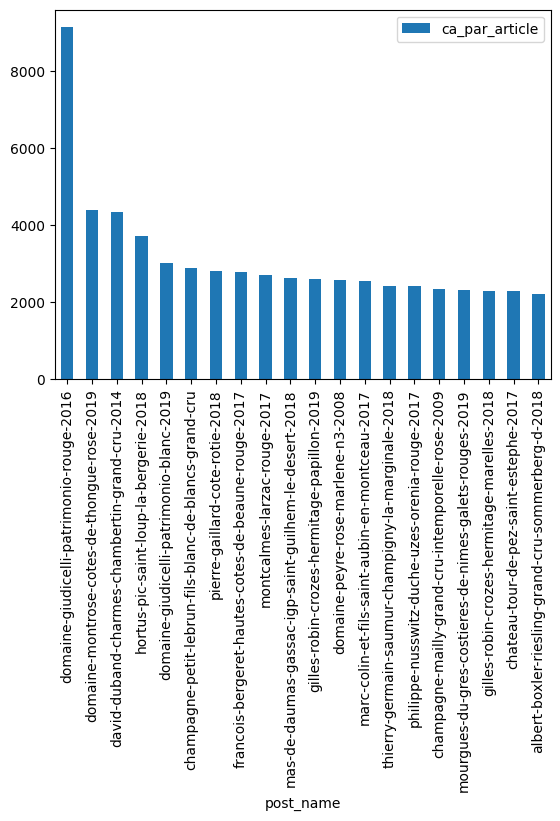

In [89]:
#Graphique en barre des 20 premiers articles avec plotly express
df_boutique_web.sort_values(by='ca_par_article', ascending=False).head(20).plot.bar(x='post_name', y='ca_par_article')

In [90]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_boutique_web['part_ca'] = df_boutique_web['ca_par_article'] / df_boutique_web['ca_par_article'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_boutique_web['cumul_part_ca'] = df_boutique_web['part_ca'].cumsum()

In [91]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
df_boutique_web.loc[df_boutique_web['cumul_part_ca'] >= 0.8].shape[0]

111

In [92]:
df_boutique_web.shape[0]

611

In [93]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
df_boutique_web.loc[df_boutique_web['cumul_part_ca'] >= 0.8].shape[0] / df_boutique_web.shape[0]

0.18166939443535188

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [94]:
###############################
# Palmares des articles en quantité #
###############################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_boutique_web
df_boutique_web.sort_values(by='stock_quantity', ascending=False)
#Réinitialiser l'index du dataset par un reset_index
df_boutique_web = df_boutique_web.reset_index()
#Afficher les 20 premier articles en quantité
df_boutique_web.sort_values(by='stock_quantity', ascending=False).head(20)

,level_0,index,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,...,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca
116,116,116,4208,1,7.6,578,16024,16.0,taxable,2018-02-15 15:43:45,...,2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.851066,4392.8,0.012232,0.228213
561,561,561,6207,1,25.2,363,16077,37.0,taxable,2019-07-24 09:33:52,...,2018.0,6-8 ans,75cl,14%,15°C,"Cuisine méditerranéenne, Gibiers à plumes, Pig...",-0.220900,9147.6,0.025472,0.928034
371,371,371,4963,1,7.0,289,15958,2.0,taxable,2018-06-02 09:28:24,...,2018.0,4-7 ans,75cl,13%,16°C,"Viande Blanche, Viande rouge, Volaille",-0.872549,2023.0,0.005633,0.597106
328,328,328,4861,1,8.5,284,15307,29.0,taxable,2018-05-03 12:49:00,...,2018.0,3-5 ans,75cl,"13,5%",15°C,"Grillades, Viande Blanche, Viande rouge, Volaille",-0.818842,2414.0,0.006722,0.535173
91,91,91,4176,1,13.5,276,15629,9.0,taxable,2018-02-14 17:25:46,...,2020.0,3-5 ans,75cl,13%,15°C,"Grillades, Viande Blanche, Volaille",-0.639818,3726.0,0.010375,0.152672
21,21,21,4058,1,8.7,267,16318,11.0,taxable,2018-02-12 12:07:23,...,2020.0,3-5 ans,75cl,14%,15°C,"Charcuterie, Grillades, Viande rouge, Volaille",-0.811681,2322.9,0.006468,0.035176
326,326,326,4858,1,6.5,257,16342,1.0,taxable,2018-05-03 11:37:55,...,2020.0,3 ans,75cl,"12,50%",10°C,"Apéritif, Charcuterie, Grillades, Poisson gril...",-0.890452,1670.5,0.004652,0.526392
219,219,219,4609,1,11.8,237,15145,0.0,taxable,2018-04-13 14:31:47,...,2017.0,3-5 ans,75cl,"13,5%",15°C,"Fondue Bourguignonne, Fricassé aux cèpes, Riso...",-0.700686,2796.6,0.007787,0.387917
496,496,496,5779,1,5.8,211,16213,8.0,taxable,2019-03-15 10:24:21,...,2020.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.915515,1223.8,0.003408,0.791317
102,102,102,4191,1,9.3,209,16263,12.0,taxable,2018-02-15 10:36:35,...,2019.0,3-5 ans,75cl,14%,14°C,"Cuisine méditerranéenne, Grillades, Légumes fa...",-0.790198,1943.7,0.005412,0.186019


<Axes: xlabel='post_name'>

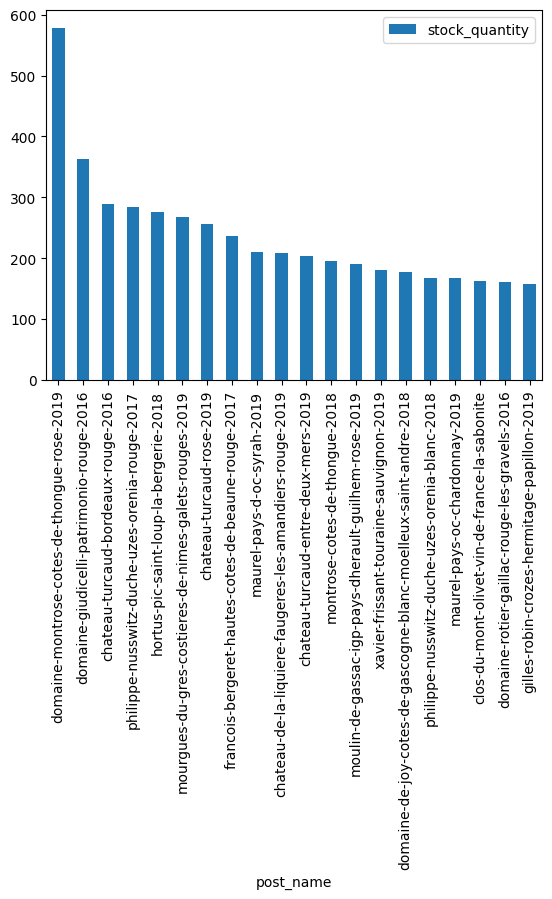

In [95]:
#Graphique en barre des 20 premiers articles avec plotly express
df_boutique_web.sort_values(by='stock_quantity', ascending=False).head(20).plot.bar(x='post_name', y='stock_quantity')

In [96]:
#############################
# Calculer le 20 / 80 en quantités #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_boutique_web['part_quantite'] = df_boutique_web['stock_quantity'] / df_boutique_web['stock_quantity'].sum()
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_boutique_web['cumul_part_quantite'] = df_boutique_web['part_quantite'].cumsum()

In [97]:
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_boutique_web.loc[df_boutique_web['cumul_part_quantite'] >= 0.8].shape[0]

144

In [98]:
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
df_boutique_web.loc[df_boutique_web['cumul_part_quantite'] >= 0.8].shape[0] / df_boutique_web.shape[0]

0.23567921440261866

In [99]:
df_boutique_web.head()

,level_0,index,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
0,0,0,3847,1,24.2,0,15298,6.0,taxable,2018-02-08 12:58:52,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,0.0,0.0,0.0,0.0,0.0
1,1,1,3849,1,34.3,0,15296,0.0,taxable,2018-02-08 13:49:41,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0,0.0,0.0,0.0,0.0
2,2,2,3850,1,20.8,0,15300,0.0,taxable,2018-02-08 14:08:36,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0,0.0,0.0,0.0,0.0
3,3,3,4032,1,14.1,0,19814,3.0,taxable,2018-02-09 14:01:05,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,0.0,0.0,0.0,0.0,0.0
4,4,4,4039,1,46.0,0,19815,0.0,taxable,2018-02-12 09:04:37,...,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0,0.0,0.0,0.0,0.0


In [100]:
df_boutique_web = df_boutique_web.drop(columns=['index', 'level_0'])
df_boutique_web.head()

,product_id,onsale_web,price,stock_quantity,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
0,3847,1,24.2,0,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,0.0,0.0,0.0,0.0,0.0
1,3849,1,34.3,0,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0,0.0,0.0,0.0,0.0
2,3850,1,20.8,0,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0,0.0,0.0,0.0,0.0
3,4032,1,14.1,0,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,0.0,0.0,0.0,0.0,0.0
4,4039,1,46.0,0,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,...,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [101]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.
df_boutique_web.to_excel('df_boutique_web.xlsx')